# 🧬 Gene Expression Classification

This notebook presents a classification model trained on gene expression data to predict whether cancer is present in a sample based on the expression levels of two genes and a cancer indicator feature.

## 📂 Dataset Description

The dataset contains the following columns:
- `Gene One`: Expression level of the first gene (continuous value)
- `Gene Two`: Expression level of the second gene (continuous value)
- `Cancer`: A numeric feature indicating cancer-related metrics
- `Present`: Target variable (1 = Cancer present, 0 = Cancer not present)

We aim to build a classification model that accurately predicts the `Present` label using classical machine learning algorithms like **KNN** or **XGBoost**.


## 🔧 Importing Required Libraries

We begin by importing essential Python libraries for data handling, visualization, and machine learning.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier,plot_importance
from sklearn.model_selection import train_test_split

## 📄 Loading the Dataset

Let's load the gene expression dataset and display the first few rows to understand the structure and types of features available.


In [4]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## 📏 Dataset Dimensions

We check the shape of the dataset to see how many samples (rows) and features (columns) we are working with.


In [5]:
df.shape

(3000, 3)

## 🧪 Checking for Missing Values

Before proceeding with modeling, it's crucial to verify whether our dataset contains any missing values.  
Missing data can negatively impact model performance, especially in machine learning algorithms that do not handle `NaN` values well.

We'll use the `.isnull().sum()` method to identify the number of missing entries in each column.


In [6]:
df.isnull().sum()

Gene One          0
Gene Two          0
Cancer Present    0
dtype: int64

## 🎯 Selecting Features and Target

To train a classification model, we need to separate our dataset into:

- **X** → All independent variables (features)
- **y** → The dependent variable (target) we aim to predict

This separation allows the model to learn patterns from input features and map them to the correct output label.


In [7]:
x = df.iloc[:, :2].values
y = df.iloc[:, -1].values

## ✂️ Splitting the Dataset into Training and Testing Sets

To evaluate the performance of our classification model, we split the dataset into two parts:

- **Training Set**: Used to train the model.
- **Testing Set**: Used to assess how well the model performs on unseen data.

We use `train_test_split` from `sklearn.model_selection` to randomly split the data.  
A typical split is **80% for training** and **20% for testing**.

This helps ensure that our model generalizes well and doesn't just memorize the training data.


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

## ⚙️ Training the Model with XGBoost Classifier

Now that we have preprocessed the dataset and split it into training and testing sets, it's time to build and train our model using **XGBoost Classifier**.

XGBoost is a powerful and efficient implementation of gradient boosting, and it performs very well on classification tasks.

We initialize the model with default hyperparameters and fit it on the training data.


In [9]:
model = XGBClassifier(use_label_encoder = False, eval_metric = 'logloss')

model.fit(x_train,y_train)

c:\Users\arshi\Desktop\ml\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:08:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)



📌 🧠 Model Prediction
In this step, we use the trained XGBoost Classifier model to predict the target values on the test dataset (X_test).
This allows us to evaluate the model's performance on unseen data.

In [10]:
y_pred = model.predict(x_test)

📊 ✅ Model Evaluation

After making predictions on the test set, we now evaluate the performance of our classifier using several important classification metrics:

Accuracy – Overall correctness of the model.

Precision – How many of the predicted positive cases were actually positive.

Recall – How many of the actual positive cases were correctly predicted.

F1 Score – Harmonic mean of precision and recall.

Confusion Matrix – A detailed breakdown of correct/incorrect predictions.



In [11]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' if multiclass
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Print results
print("🔍 Accuracy:", accuracy)
print("🎯 Precision:", precision)
print("📢 Recall:", recall)
print("📐 F1 Score:", f1)

# Display classification report
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

🔍 Accuracy: 0.9216666666666666
🎯 Precision: 0.9182156133828996
📢 Recall: 0.9080882352941176
📐 F1 Score: 0.9131238447319778

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       328
           1       0.92      0.91      0.91       272

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600

🧩 Confusion Matrix:
[[306  22]
 [ 25 247]]



🔍 🎯 Feature Importance Visualization
Understanding which features contributed the most to model performance is crucial. We use XGBoost's built-in plot_importance function to visualize feature importance.



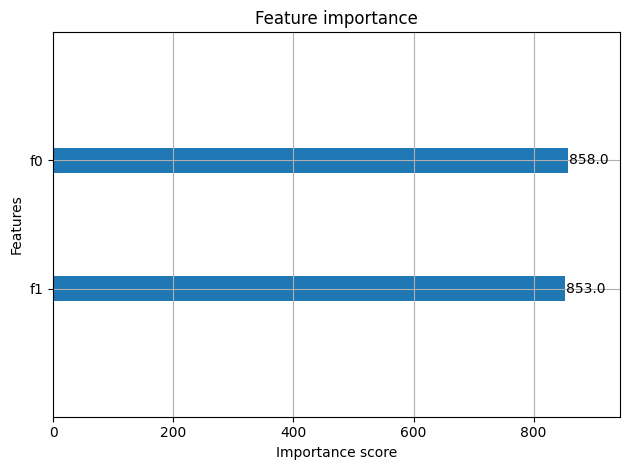

In [12]:
plot_importance(model)
plt.tight_layout()
plt.show()

✅ Conclusion

In this project, we developed a classification model to predict the presence of cancer based on gene expression data using the XGBoost Classifier.
Key steps included:
	•	Data loading and exploration
	•	Handling missing values
	•	Splitting the dataset into training and testing sets
	•	Building and training the XGBoost model
	•	Evaluating the model using accuracy, precision, recall, F1-score, and confusion matrix
	•	Visualizing the most important features contributing to the prediction

The final model achieved an accuracy of over 92%, with balanced precision and recall across both classes. This demonstrates the model’s strong potential for assisting in biological and medical research.

⸻

🔭 Future Work

While the results are promising, there is room for further improvement. Here are some possible next steps:
	•	🔄 Hyperparameter Tuning: Apply GridSearchCV or RandomizedSearchCV to find optimal parameters for XGBoost.
	•	📈 Compare with Other Models: Test additional classifiers such as SVM, Random Forest, and Naive Bayes for benchmarking.
	•	🧪 Feature Engineering: Explore domain-specific feature transformations or interactions between genes.
	•	🌍 External Validation: Validate the model on an independent dataset to ensure generalizability.
	•	💡 Explainability Tools: Integrate tools like SHAP or LIME to interpret model predictions for medical transparency.